In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms


In [45]:
df=pd.read_csv("airline_passengers.csv")

In [46]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [47]:
len(df)

145

In [48]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [49]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [50]:
df.dropna(axis=0,inplace=True)

In [51]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [53]:
df["Month"]=pd.to_datetime(df["Month"])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [55]:
df.set_index("Month",inplace=True)

In [56]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<Axes: xlabel='Month'>

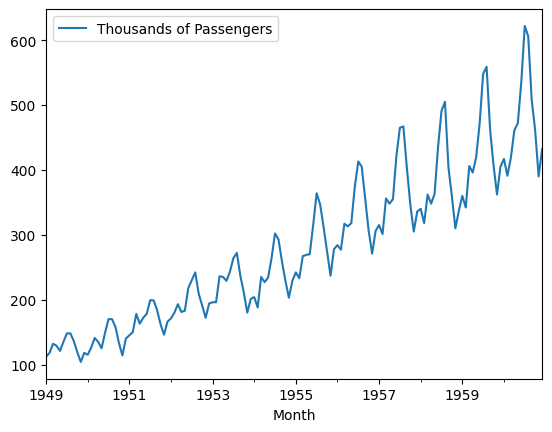

In [57]:
df.plot()

In [58]:
from statsmodels.tsa.stattools import adfuller

In [72]:
def adf_test(series):
    result=adfuller(series)
    print("ADF statistics: ",result[0])
    print("P Value: ",result[1])
    if result[1]<=0.05:
        print("Reject the null hypothesis the Data has unit root and is stationary")
    else:
        print("Accept the null hypothesis the data has no unit root is not stationary")

In [73]:
adf_test(df["Thousands of Passengers"])

ADF statistics:  0.8153688792060482
P Value:  0.991880243437641
Accept the null hypothesis the data has no unit root is not stationary


In [74]:
df["Thousands of Passengers"].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Thousands of Passengers, Length: 144, dtype: float64

In [75]:
df["Thousands of Passengers diffrencing 1"]=df["Thousands of Passengers"]-df["Thousands of Passengers"].shift(1)

In [76]:
df

,Thousands of Passengers,Thousands of Passengers diffrencing 1,Thousands of Passengers diffrencing 2
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [77]:
adf_test(df["Thousands of Passengers diffrencing 1"].dropna())

ADF statistics:  -2.8292668241699994
P Value:  0.0542132902838255
Accept the null hypothesis the data has no unit root is not stationary


In [78]:
df["Thousands of Passengers diffrencing 2"]=df["Thousands of Passengers diffrencing 1"]-df["Thousands of Passengers diffrencing 1"].shift(1)

In [79]:
adf_test(df["Thousands of Passengers diffrencing 2"].dropna())

ADF statistics:  -16.384231542468505
P Value:  2.7328918500142407e-29
Reject the null hypothesis the Data has unit root and is stationary


In [80]:
## Need to check 12 shift as the data is Seasonal data

df["Thousands of Passengers diffrencing 12"]=df["Thousands of Passengers"]-df["Thousands of Passengers"].shift(12)

In [81]:
adf_test(df["Thousands of Passengers diffrencing 12"].dropna())

ADF statistics:  -3.383020726492481
P Value:  0.011551493085514954
Reject the null hypothesis the Data has unit root and is stationary


In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

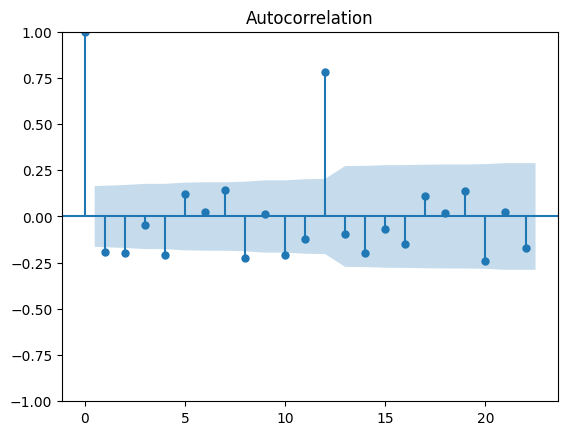

In [83]:
acf=plot_acf(df["Thousands of Passengers diffrencing 2"].dropna())

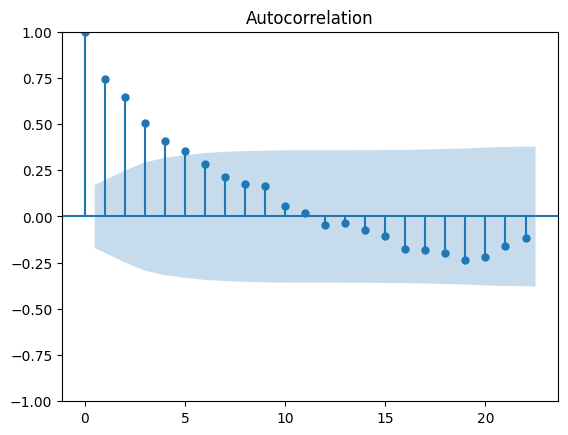

In [85]:
acf=plot_acf(df["Thousands of Passengers diffrencing 12"].dropna())

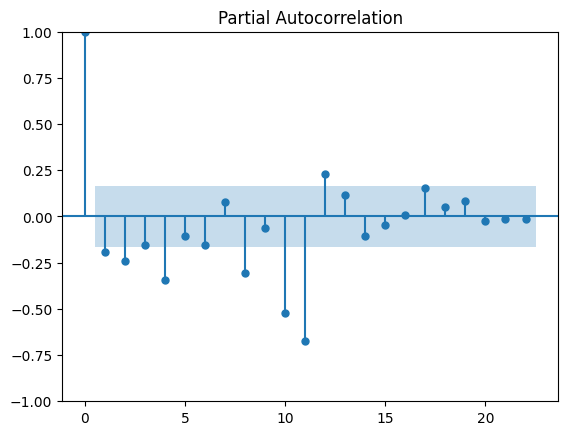

In [84]:
pacf=plot_pacf(df["Thousands of Passengers diffrencing 2"].dropna())

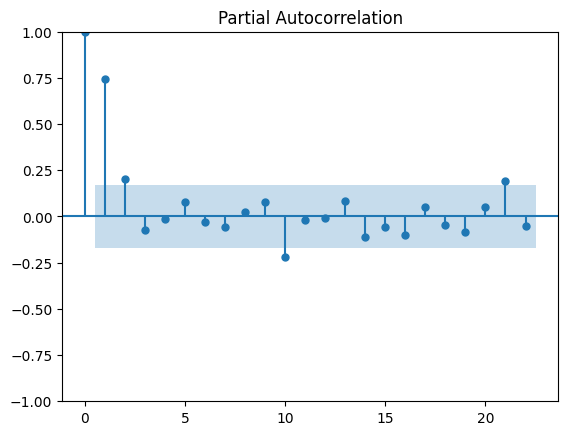

In [86]:
pacf=plot_pacf(df["Thousands of Passengers diffrencing 12"].dropna())

In [87]:
df

,Thousands of Passengers,Thousands of Passengers diffrencing 1,Thousands of Passengers diffrencing 2,Thousands of Passengers diffrencing 12
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [88]:
from datetime import datetime,timedelta

In [90]:
timedelta(days=1)

datetime.timedelta(days=1)

In [89]:
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [91]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [93]:
test_data

,Thousands of Passengers,Thousands of Passengers diffrencing 1,Thousands of Passengers diffrencing 2,Thousands of Passengers diffrencing 12
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [97]:
test_data.index[0]

Timestamp('1956-01-01 00:00:00')

In [98]:
test_data.index[-1]

Timestamp('1960-12-01 00:00:00')

In [92]:
#Prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [101]:
train_data

,Thousands of Passengers,Thousands of Passengers diffrencing 1,Thousands of Passengers diffrencing 2,Thousands of Passengers diffrencing 12
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [107]:
Model_Arima=sms.tsa.arima.ARIMA(train_data["Thousands of Passengers"],order=(10,2,0))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
model_arima_fit=Model_Arima.fit()

In [109]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 23 May 2024   AIC                            736.477
Time:                             20:43:52   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data["Thousands of Passengers"]-pred

In [112]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478354
1956-03-01      0.556987
1956-04-01      5.172458
1956-05-01     -0.544231
1956-06-01     25.077921
1956-07-01     46.979715
1956-08-01     58.432469
1956-09-01     22.879034
1956-10-01     -1.734753
1956-11-01    -40.623910
1956-12-01    -33.828195
1957-01-01    -34.840403
1957-02-01    -55.098230
1957-03-01      5.312176
1957-04-01     -2.080460
1957-05-01     -6.157689
1957-06-01     40.783489
1957-07-01     82.680631
1957-08-01     94.147425
1957-09-01     39.889907
1957-10-01     -9.108921
1957-11-01    -66.293786
1957-12-01    -49.323592
1958-01-01    -52.077833
1958-02-01    -73.405846
1958-03-01    -26.404576
1958-04-01    -43.572852
1958-05-01    -39.448075
1958-06-01     21.744321
1958-07-01     80.146590
1958-08-01     97.329461
1958-09-01      1.513669
1958-10-01    -47.089143
1958-11-01   -108.125309
1958-12-01    -89.012370
1959-01-01    -69.205575
1959-02-01    -85.352226
1959-03-01    -22.150982
1959-04-01    -36.7

<Axes: ylabel='Density'>

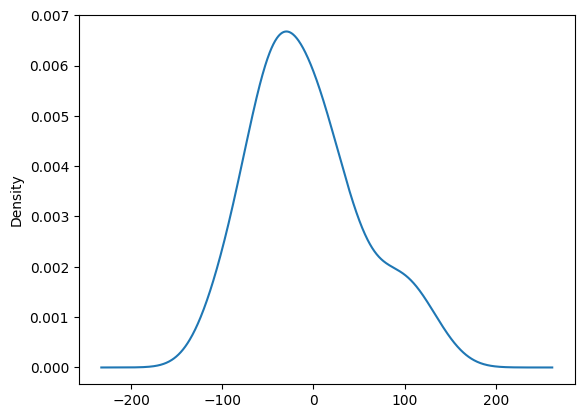

In [117]:
residuals.plot(kind="kde")

In [118]:
test_data["Predicted Arima"]=pred

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16032\477301040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted Arima"]=pred


<Axes: xlabel='Month'>

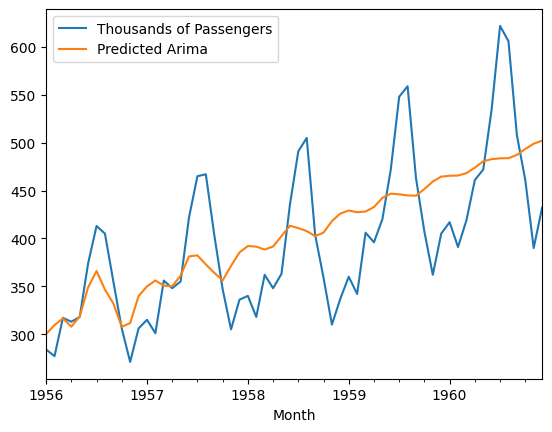

In [120]:
test_data[["Thousands of Passengers","Predicted Arima"]].plot()

In [122]:
Model_Serimax=sms.tsa.statespace.SARIMAX(train_data["Thousands of Passengers"],order=(10,2,0),seasonal_order=(0,1,0,12))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [123]:
Serimax_Result=Model_Serimax.fit()

In [125]:
test_data['Serimax forecast']=Serimax_Result.predict(start=pred_start_date,end=pred_end_date,dynamic=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16032\2524280024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Serimax forecast']=Serimax_Result.predict(start=pred_start_date,end=pred_end_date,dynamic=True)


<Axes: xlabel='Month'>

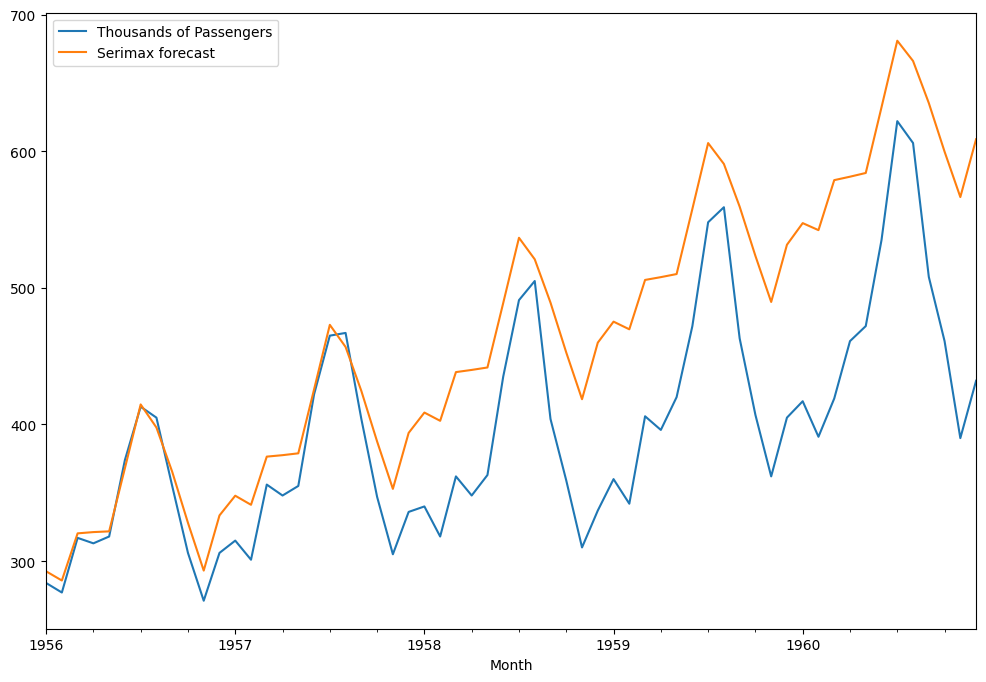

In [126]:
test_data[["Thousands of Passengers",'Serimax forecast']].plot(figsize=(12,8))

In [127]:
Serimax_Result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(10, 2, 0)x(0, 1, 0, 12)   Log Likelihood                -262.071
Date:                             Thu, 23 May 2024   AIC                            546.142
Time:                                     20:59:47   BIC                            570.875
Sample:                                 01-01-1949   HQIC                           555.966
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1196      0.126     -8.857      0.000      -1.367      -0.872
ar.L2         -0.9975      0.173     -5.754      0.000      -1.337      -0.658
ar.L3         -1.1442      0.193     -5.926      0.000      -1.523      -0.766
ar.L4         -1.0771      0.256     -4.204      0.000      -1.579      -0.575
ar.L5         -0.8645      0.336     -2.574      0.010      -1.523      -0.206
ar.L6         -0.6553      0.312     -2.099      0.036      -1.267      -0.043
ar.L7         -0.5598      0.285     -1.963      0.050      -1.119      -0.001
ar.L8         -0.3992      0.267     -1.497      0.134      -0.922       0.124
ar.L9         -0.1312      0.220     -0.597      0.551      -0.562       0.300
ar.L10        -0.0757      0.132     -0.571      0.568      -0.335       0.184
sigma2       100.6615     19.166      5.252      0.000      63.098     138.225
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.46
Prob(Q):                              0.95   Prob(JB):                         0.11
Heteroskedasticity (H):               2.42   Skew:                             0.62
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

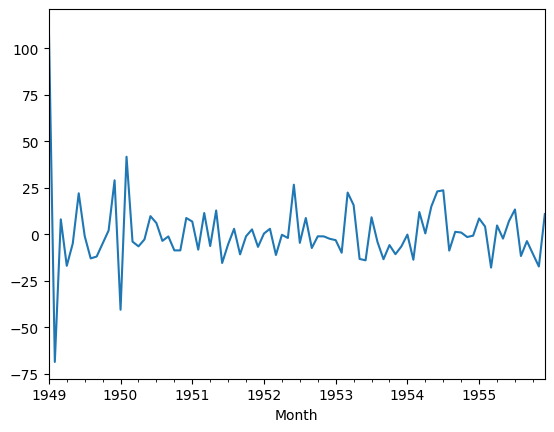

In [129]:
Serimax_Result.resid.plot()

<Axes: ylabel='Density'>

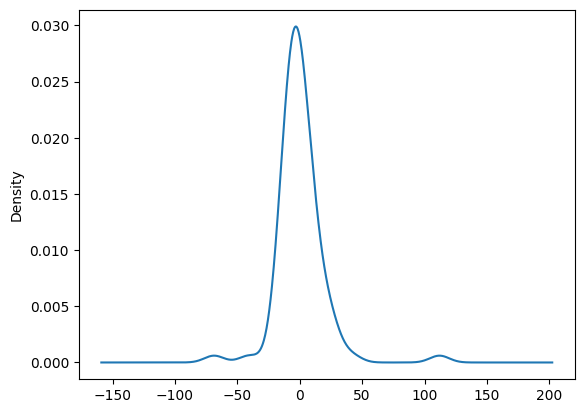

In [130]:
Serimax_Result.resid.plot(kind="kde")